# Hands-on Activity 6.1: Smile Detection

| name| course/section | date submitted | date performed |
|---|---|---|---|
| John Edward Binay | CPE 019-CPE32S2| 2022-03-08 | 2020-03-08 |

# part 1

In [38]:
# Code Cell 1 
# Importing cv2 
import cv2 
from IPython.display import display, clear_output 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [39]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [40]:
smile = cv2.imread(r"/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Emerging Technologies 2 (Big Data)/HA 6.1/smile.jpg")
no_smile = cv2.imread(r"/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Emerging Technologies 2 (Big Data)/HA 6.1/nosmile.JPG")

Text(0.5, 1.0, 'No smile')

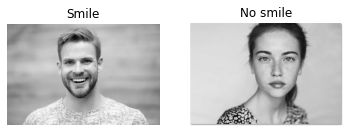

In [41]:
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY), cmap='gray') 
ax[0].axis('off') 
ax[0].set_title('Smile') 
ax[1].imshow(cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY), cmap='gray') 
ax[1].axis('off') 
ax[1].set_title('No smile') 

In [42]:
# Code Cell 4 
# path to the file containing the features that the openCv pipeline will look for in the frame 
cascadePath = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Emerging Technologies 2 (Big Data)/HA 6.1/haarcascade_frontalface_default.xml" 
# initialize a model for detecting whether a certain portion of an image contains a face 
faceCascade = cv2.CascadeClassifier(cascadePath)

In [43]:
gray_smile = cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY)

In [44]:
faces = faceCascade.detectMultiScale( 
       gray_smile, 
       scaleFactor=1.1, 
       minNeighbors=6, 
       minSize=(100, 100), 
       flags=cv2.CASCADE_SCALE_IMAGE 
   ) 
# output of the classifier 
faces 

array([[251, 109, 245, 245]], dtype=int32)

(-0.5, 799.5, 531.5, -0.5)

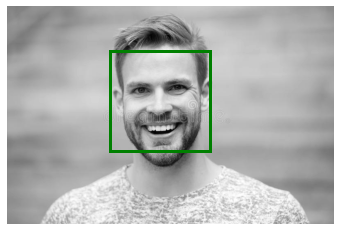

In [45]:
# Code Cell 7 
# draw a rectangle 
from matplotlib.patches import Rectangle 
# visualize the detected face 
fig, ax = plt.subplots() 
ax.imshow(gray_smile, cmap='gray') 
# iterate over all the detected faces 
for face in faces: 
   # retrieve the coordinates of the position of the current face, and its size    
   (x_smile, y_smile, w_smile, h_smile) = face 
   # draw a rectangle where the face is detected     
   ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, 
lw=3, color='green')) 
ax.axis('off')

In [46]:
# repeat process above but fot the nosmile image
gray_nosmile = cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY)

In [47]:
# Code Cell 6 
# openCv algorithm to scan the image looking for haar features 
faces = faceCascade.detectMultiScale( 
       gray_nosmile, 
       scaleFactor=1.1, 
       minNeighbors=6, 
       minSize=(100, 100), 
       flags=cv2.CASCADE_SCALE_IMAGE 
   ) 
# output of the classifier 
faces 

array([[249,  49, 297, 297]], dtype=int32)

(-0.5, 701.5, 473.5, -0.5)

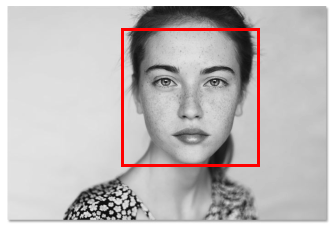

In [48]:
# Code Cell 7 
# draw a rectangle 
from matplotlib.patches import Rectangle 
# visualize the detected face 
fig, ax = plt.subplots() 
ax.imshow(gray_nosmile, cmap='gray') 
# iterate over all the detected faces 
for face in faces: 
# retrieve the coordinates of the position of the current face, and its size    
   (x_nosmile, y_nosmile, w_nosmile, h_nosmile) = face 
   # draw a rectangle where the face is detected     
   ax.add_artist(Rectangle((x_nosmile, y_nosmile), w_nosmile, h_nosmile, fill=False, 
lw=3, color='red')) 
ax.axis('off')

# Part 2

In [49]:
# Code Cell 10 
# select only the face portion from the smile test image 
face_smile = gray_smile[y_smile:y_smile+h_smile, x_smile:x_smile+w_smile] 
# The cropping coefficient for determining the size of the face 
c1 = 0.2 
# calculate how to crop the face 
# vertical dimension 
v_cut = int(c1 * w_smile) 
# horizontal dimension 
h_cut = int(c1 * h_smile) 
# select only the face portion from the smile test image 
cut_face_smile = gray_smile[y_smile+v_cut:y_smile+h_smile,  
                     x_smile+h_cut:x_smile-h_cut+w_smile] 

In [50]:
# Code Cell 11 
# select only the face portion from the non-smile test image 
face_nosmile = gray_nosmile[y_nosmile:y_nosmile+h_nosmile, x_nosmile:x_nosmile+w_nosmile] 
# The cropping coefficient for determining the size of the face 
c2 = 0.2 
# calculate how to crop the face  
# vertical dimension 
v_cut = int(c2 * w_nosmile) 
# horizontal dimension 
h_cut = int(c2 * h_nosmile) 
# select only the face portion from the non smile test image 
cut_face_nosmile = gray_nosmile[y_nosmile+v_cut:y_nosmile+h_nosmile,  
                     x_nosmile+h_cut:x_nosmile-h_cut+w_nosmile] 

(-0.5, 178.5, 237.5, -0.5)

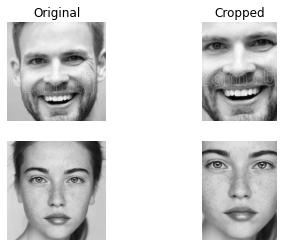

In [51]:
# Code Cell 12 
fig, ax = plt.subplots(2, 2) 
ax[0][0].imshow(face_smile, cmap='gray') 
ax[0][0].axis('off') 
ax[0][0].set_title('Original') 
ax[0][1].imshow(cut_face_smile, cmap='gray') 
ax[0][1].axis('off') 
ax[0][1].set_title('Cropped') 
ax[1][0].imshow(face_nosmile, cmap='gray') 
ax[1][0].axis('off') 
ax[1][1].imshow(cut_face_nosmile, cmap='gray') 
ax[1][1].axis('off')

How would the two coefficients (cv and ch) affect the detected faces?

    The coefficients affect the detected faces because they are used to stretch the size of the face. The purpose of this is to make the test images/faces look more similar to the ones composing he training se over which the model was trained, to make the classification task easier.

In [52]:
# Code Cell 13 
# import the numpy and scipy libraries to zoom the images 
import numpy as np 
from scipy.ndimage import zoom 
# transform the stretched smiling face so that it has 64x64 pixels 
standardized_face_smile = zoom(cut_face_smile, (64. / cut_face_smile.shape[0], 
                                          64. / cut_face_smile.shape[1])).astype(np.float32)

In [53]:
# Code Cell 14 
# normalize the image so that its values are between 0 and 1 
standardized_face_smile /= float(255)

In [54]:
# Code Cell 15 
# transform the stretched non smiling face so that it has 64x64 pixels 
standardized_face_nosmile = zoom(cut_face_nosmile, (64. / cut_face_nosmile.shape[0], 
                                          64. / cut_face_nosmile.shape[1])).astype(np.float32)
# normalize the image so that its values are between 0 and 1 
standardized_face_nosmile /= float(255)

(-0.5, 63.5, 63.5, -0.5)

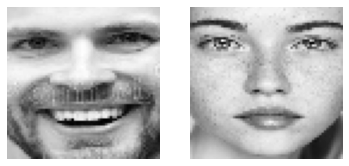

In [55]:
# Code Cell 16 
plt.subplot(121) 
plt.imshow(standardized_face_smile[:, :], cmap='gray') 
plt.axis('off') 
plt.subplot(122) 
plt.imshow(standardized_face_nosmile[:, :], cmap='gray') 
plt.axis('off') 

# Part 3: Loading a pre-trained model

In [56]:
!pip install scikit-learn==0.19.2

In [57]:
import pickle as pkl

with open(r"/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Emerging Technologies 2 (Big Data)/HA 6.1/pl-app_2.0.0-support_vector_machines.pkl", 'rb') as f:
    classifier = pkl.load(f)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SVC from version 0.19.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  


In [58]:
pred = classifier.predict((standardized_face_smile.ravel()).reshape(1, -1)) 
print(pred)

[1]


In [59]:
# Code Cell 19 
answers = {0: 'NOT SMILING.', 1:'SMILING.'} 

The person in this picture is SMILING.


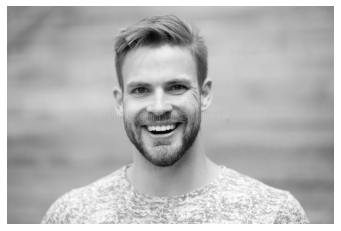

In [60]:
# Code Cell 20 
plt.imshow(gray_smile[:, :], cmap='gray') 
plt.axis('off') 
print('The person in this picture is', answers[pred[0]])

In [61]:
pred = classifier.predict((standardized_face_nosmile.ravel()).reshape(1, -1)) 
print(pred)

[0]


The person in this picture is NOT SMILING.


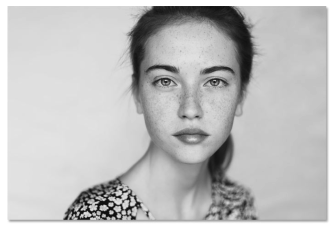

In [64]:
plt.imshow(gray_nosmile[:, :], cmap='gray') 
plt.axis('off') 
print('The person in this picture is', answers[pred[0]])

# Conclusion

In conclusion, this exercise was very exciting since this was the very first time that I got to predict something that invloved images. This has inspired me to create auotmated face detection at home using my microcontrolers. The task was a bit difficult since there were a lot of topics that I have not encountered before.